In [1]:
import networkx as nx
import math
import matplotlib.pyplot as plt

Suppose that you plan to spend your summer vacations in Romania. Following is the map of Romania.

![map_of_Romania](image.png)

In [2]:
G = nx.Graph()

G.add_nodes_from(["Arad", "Bucharest", "Oradea", "Zerind", "Timisoara", "Lugoj", "Mehadia", "Dobreta", "Craiova", 
                  "Rimnicu Vilcea", "Sibiu", "Fagaras", "Pitesti", "Giurgiu", "Urziceni", "Vaslui", "Lasi","Neamt",
                  "Hirsova", "Eforie"]) #add remaining nodes to the list

In [3]:
edges = [("Arad", "Zerind", 75),("Arad", "Sibiu", 140), ("Arad", "Timisoara", 118),("Bucharest", "Urziceni",85),
         ("Bucharest", "Giurgiu",90),("Bucharest", "Pitesti",101),("Bucharest", "Fagaras",211),
         ("Craiova", "Dobreta",120),("Craiova", "Pitesti",138),("Craiova","Rimnicu Vilcea", 146),
         ("Dobreta", "Mehadia", 75),("Eforie", "Hirsova", 86),("Fagaras", "Sibiu", 99),("Hirsova", "Urziceni", 98),
         ("Lasi", "Neamt", 87),("Lasi", "Vaslui", 92),("Lugoj", "Mehadia", 70),("Lugoj", "Timisoara",111),
         ("Oradea", "Zerind", 71),("Oradea", "Sibiu", 151),("Pitesti", "Rimnicu Vilcea", 97),
         ("Rimnicu Vilcea", "Sibiu",80),("Urziceni", "Vaslui",142)]

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

In [4]:
# Set node positions using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)


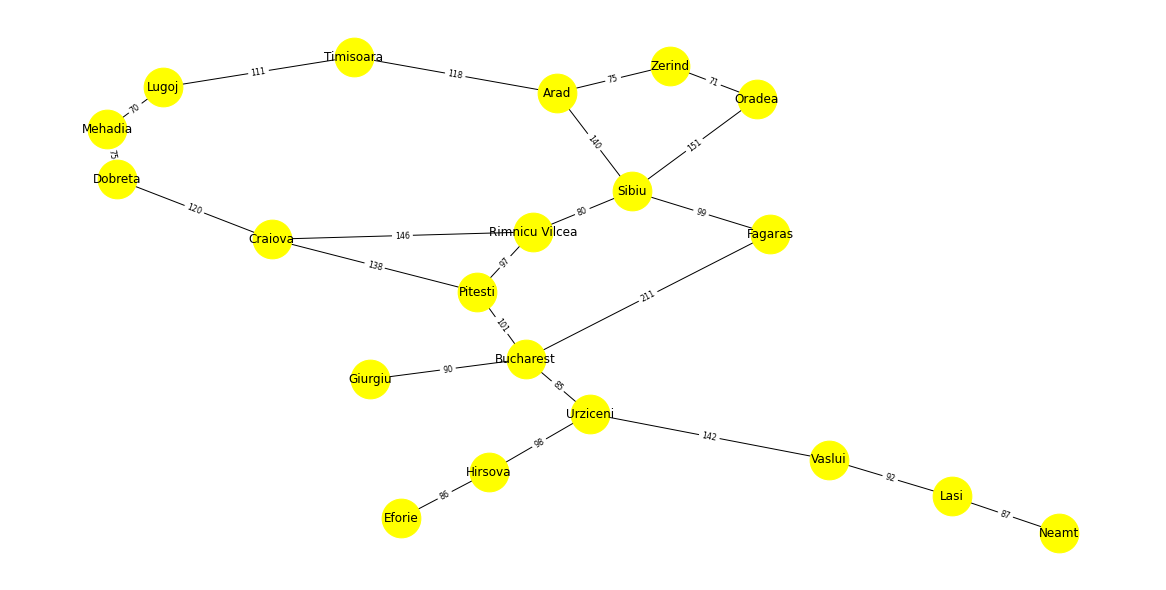

In [5]:
# Draw graph with labels and edge weights
plt.figure(figsize=(16, 8))
nx.draw(G, pos, with_labels=True, font_size=12, node_size= 1500, node_color ="yellow")

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()

In [6]:
lat_long = {
'Arad': (46.1667, 21.3167), 'Bucharest': (44.4167, 26.1000),
'Craiova': (44.3333, 23.8167), 'Dobreta': (44.6259, 22.6566),
'Eforie': (44.0667, 28.6333), 'Fagaras': (45.8416, 24.9730),
'Giurgiu': (43.9037, 25.9699), 'Hirsova': (44.6833, 27.9500),
'Iasi': (47.1585, 27.6014), 'Lugoj': (45.6904, 21.9033),
'Neamt': (46.9283, 26.3705), 'Oradea': (47.0553, 21.9214),
'Pitesti': (44.8565, 24.8697), 'Rimnicu Vilcea': (45.1042, 24.3758),
'Sibiu': (45.7977, 24.1521), 'Timisoara': (45.7489, 21.2087),
'Urziceni': (44.7167, 26.6333), 'Vaslui': (46.6333, 27.7333),
'Zerind': (46.6225, 21.5174),   'Mehadia' : (44.904114, 22.364516)
}

In [7]:
lat1, lon1 = lat_long['Arad']

In [8]:
lat_long['Arad']

(46.1667, 21.3167)

In [9]:
for i in lat_long.keys():
    print(i)


Arad
Bucharest
Craiova
Dobreta
Eforie
Fagaras
Giurgiu
Hirsova
Iasi
Lugoj
Neamt
Oradea
Pitesti
Rimnicu Vilcea
Sibiu
Timisoara
Urziceni
Vaslui
Zerind
Mehadia


In [10]:
# Calculates heuristic value
def heuristic(city1, city2):
    lat1, lon1 = lat_long[city1]
    lat2, lon2 = lat_long[city2]
    a = abs(lon2 - lon1)
    b = abs(lat2 - lat1)
    return math.sqrt(a**2 + b**2) if city1 != city2 else 0

In [11]:
# Node class
class Node():
    def __init__(self, state, parent=None, action=None, g=0, h=0):    # Const decrelation with default values 
        self.state = state
        self.parent = parent
        self.action = action
        self.g = g
        self.h = h
    
    @property
    def f(self):  # method as a "getter" for a class attribute
        return self.g + self.h

In [12]:
v= Node('Arad')

In [13]:
for neighbor in G[v.state]:
    print(neighbor)

Zerind
Sibiu
Timisoara


In [14]:
for neighbor, weight in G[v.state].items():
    print(neighbor ,"    ", weight['weight'])

Zerind      75
Sibiu      140
Timisoara      118


In [15]:
# Accessing integer values in G
Zerind_weight = G[v.state]['Zerind']['weight']  
Sibiu_weight = G[v.state]['Sibiu']['weight'] 
Timisoara_weight = G[v.state]['Timisoara']['weight']  


print(Zerind_weight, Sibiu_weight,Timisoara_weight)

75 140 118


In [16]:
# Frontier class / Open list
class PriorityQueue():
    def __init__(self):
        self.frontier = []      

    def add(self, node):
        i = 0
        while i < len(self.frontier) and node.f > self.frontier[i].f:
            i += 1
        self.frontier.insert(i, node)
        
    def get_state(self, state):
        for node in self.frontier:
            if node.state == state:
                return node
        return None

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("Frontier is empty")
        else:
            node = self.frontier.pop(0)
            return node

    def update(self, node, priority):
        for n in self.frontier:
            if n.state == node.state:
                n.g = node.g
                n.h = node.h
                break
        else:
            self.add(node)


In [17]:
# A* search algorithm
def astarSearch(start, goal, graph):
    frontier = PriorityQueue()
    firstnode = Node(start, None, None, 0, heuristic(start, goal))
    frontier.add(firstnode)
    visited = set()   # closed list
    
    while not frontier.empty():
        node = frontier.remove()
        
        if node.state == goal:
            state = []
            total_cost = 0
            while node.parent is not None:
                state.append(node.state)
                total_cost += graph[node.state][node.parent.state]['weight']
                node = node.parent
            state.append(start)
            state.reverse()
            return state, total_cost
        
        visited.add(node.state)
        for neighbor, weight in graph[node.state].items():
            if neighbor not in visited and not frontier.contains_state(neighbor):
                g = node.g + weight['weight']
                neighbor_node = Node(neighbor, node, None, g, heuristic(neighbor, goal))
                frontier.add(neighbor_node)
                
            elif frontier.contains_state(neighbor):   # if neighbor is already in frontier then checking it gcost
                #if < then new calc cost then update current neighbor node in the frotier
                current_node = frontier.get_state(neighbor)
                new_cost = node.g + weight['weight']
                
                if new_cost < current_node.g:
                    current_node.g = new_cost
                    current_node.parent = node
                    current_node.h = heuristic(current_node.state, goal)
                    frontier.update(current_node, current_node.f)
                    
    return None, None



In [18]:
start = 'Arad'
goal = 'Bucharest'
path = astarSearch(start, goal, G)
if path[0] is None:
    print(f"Could not find a path from {start} to {goal}")
else:
    print(f"Cities covered from {start} to {goal} are: {path[0]}")
    print(f"Total cost: {path[1]}")

Cities covered from Arad to Bucharest are: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Total cost: 418
